In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip
from scipy.linalg import expm, eig
from scipy.constants import hbar

# Time evolution of spin-1/2 under fixed $B_z$

The goal of this script is to demonstrate how we can use computer code to help us solve quantum mechanics problems, through the simple example of the Hamiltonian of a spin under a fixed magnetic field.

We will start by computing the eigenvalues and eigenvectors of the spin Hamiltonian $\hat{H} = g \mu_B B \hat{S}_z = \omega_0 \hat{S}_z$, where $\hat{S}_z = \frac{\hbar}{2} \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$

In [4]:
omega0 = 2 * np.pi
sZ = hbar/2 * np.array([[1,0],
                        [0,-1]])
ham = omega0 * sZ
print(ham/hbar)

[[ 3.14159265  0.        ]
 [ 0.         -3.14159265]]


Extract eigenvalues and eigenvectors of Hamiltonian (we should get $E_\pm = \pm \frac{\hbar}{2} \omega_0$ and $| E_\pm \rangle = | \pm \rangle$)

In [6]:
eVal, eStates = eig(ham)
print(eVal/hbar, eStates)

[ 3.14159265+0.j -3.14159265+0.j] [[1. 0.]
 [0. 1.]]


To compute the time evolution of an initial state $| \psi(t=0) \rangle = c_0 | E_0 \rangle + c_1 | E_1 \rangle = \begin{pmatrix} c_0 \\ c_1 \end{pmatrix}$, we first define the state

In [12]:
psi0 = np.array([1,0])
# psi0 = np.array([1,1])*1/np.sqrt(2)
print(psi0)

[1 0]


and then we evolve the state in time using $| \psi(t) \rangle = c_0 e^{-i E_0 t / \hbar} | E_0 \rangle + c_1 e^{-i E_1 t / \hbar} | E_1 \rangle$, saving the state at each point in time in a list

In [13]:
time = np.linspace(0,0.95,96)
psiT = []

for t in time:
    exps = np.array([np.exp(- 1j * eVal[0] * t / hbar), np.exp(- 1j * eVal[1] * t / hbar)])
    psiT.append(psi0 * exps)

To plot the time evolution of our state on the Bloch sphere, we first define the Pauli matrices

$\hat{\sigma}_z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$ $\hat{\sigma}_x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$ $\hat{\sigma}_y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$

In [9]:
sigZ = np.array([[1,0],
                 [0,-1]])

sigX = np.array([[0,1],
                 [1,0]])

sigY = np.array([[0,-1j],
                 [1j,0]])

and then we save a list of expectation values of each Pauli matrix for all of the saved states (e.g. $\langle \psi_t | \sigma_z | \psi_t \rangle$)

In [14]:
x = [(p.conj().T @ sigX @ p).real for p in psiT]
y = [(p.conj().T @ sigY @ p).real for p in psiT]
z = [(p.conj().T @ sigZ @ p).real for p in psiT]

Plot the evolution of the state

In [2]:
def qubitPlots(time,x,y,z):
    bsPlot = qutip.Bloch()
    bsPlot.zlabel = ['$\\left|+\\right>$', '$\\left|-\\right>$']
    bsPlot.add_points([np.array(x), np.array(y), np.array(z)])
    bsPlot.render()
    bsPlot.fig.set_size_inches([25,5])

    ax1 = bsPlot.fig.add_subplot(133)
    ax1.plot(time,x,label="x")
    ax1.plot(time,y,label="y")
    ax1.plot(time,z,label="z")
    ax1.legend()
    ax1.set_xlabel("Time")
    ax1.set_ylabel("Expectation value")

    return bsPlot

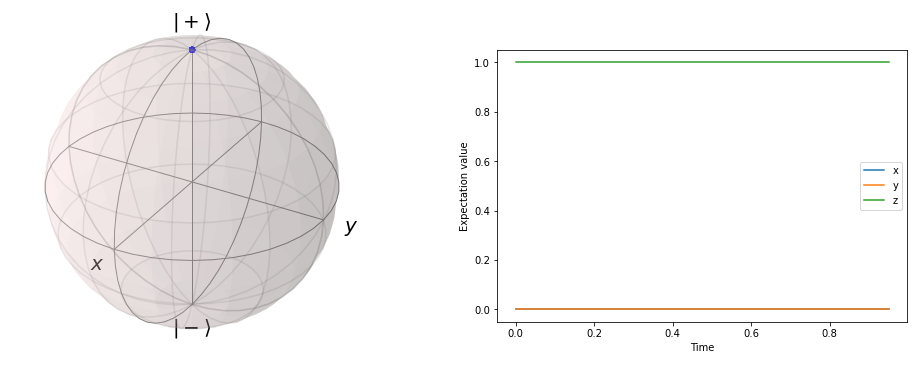

In [15]:
bsPlot = qubitPlots(time,x,y,z)
bsPlot.show()